# Title: Loan Repayment Prediction

## Step1 : Problem Statement
**This project aims to analyze borrower and loan-related features to build a classification model that predicts whether a loan will be fully repaid.**

### Info:
- credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
- purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other"). 
- int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
- installment: The monthly installments owed by the borrower if the loan is funded.
- log.annual.inc: The natural log of the self-reported annual income of the borrower.
- dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- fico: The FICO credit score of the borrower.
- days.with.cr.line: The number of days the borrower has had a credit line.
- revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
- revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
- delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

## Step2 : Data Collection
Importing Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [5]:
df = pd.read_csv("loan_data.csv")
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [7]:
# Check dataset shape
df.shape
print('Number of Rows:',df.shape[0])
print('Number of Columns:',df.shape[1])

Number of Rows: 9578
Number of Columns: 14


In [8]:
# View column names
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [9]:
# Check data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


**Observation**:The dataset contains no missing values, and all features have appropriate and correctly assigned data types.

In [11]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


**Observation**:The first few rows of the dataset show correctly structured.

In [13]:
df.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


**Observation**:The last few rows of the dataset show correctly structured.

In [15]:
# Summary statistics
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


**Observation**:The summary statistics show that most borrowers meet the credit policy, have moderate interest rates and FICO scores, while income, revolving balance, and inquiries exhibit high variability, indicating diverse financial risk profiles.

## Step3 : Data Cleaning

In [18]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

**Observation**:There are no null values in the dataset, indicating complete and reliable data.

In [20]:
df.duplicated().sum()

0

**Observtion**:The dataset contains no duplicated records, ensuring data uniqueness data.

Data Transformation : The int.rate variable was multiplied by 100 to transform `decimal interest rates into percentage format`.

In [23]:
df['int.rate'] = df['int.rate']*100

Data Transformation : An inverse logarithmic transformation was applied to convert `log.annual.inc into actual annual income values`.

In [25]:
df['log.annual.inc']=np.exp(df['log.annual.inc']).round(2)

Data Transformation : `log.annual.inc` was renamed to `annual.inc` to represent actual annual income.

In [27]:
df.rename(columns={'log.annual.inc':'annual.inc'},inplace=True)

Data Transformation : The `days.with.cr.line` column was rounded to the nearest integer for consistency.

In [29]:
df['days.with.cr.line'] = df['days.with.cr.line'].round()

## Step4 : Data Manipulation

In [31]:
df.head()

,credit.policy,purpose,int.rate,installment,annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,11.89,829.10,85000.0,19.48,737,5640.0,28854,52.1,0,0,0,0
1,1,credit_card,10.71,228.22,65000.0,14.29,707,2760.0,33623,76.7,0,0,0,0
2,1,debt_consolidation,13.57,366.86,32000.0,11.63,682,4710.0,3511,25.6,1,0,0,0
3,1,debt_consolidation,10.08,162.34,85000.0,8.10,712,2700.0,33667,73.2,1,0,0,0
4,1,credit_card,14.26,102.92,80800.0,14.97,667,4066.0,4740,39.5,0,1,0,0


In [32]:
df["credit_history_years"] = (df['days.with.cr.line']/365).round(2)
df.drop(columns=['days.with.cr.line'],inplace=True)

**Observation**: A new feature representing credit history in years was derived from the days.with.cr.line column, and the original column was removed to avoid redundancy.

In [34]:
fully_paid = df["not.fully.paid"]==0
not_fully_paid = df["not.fully.paid"]==1

print("Number of loans fully paid:",fully_paid.sum())
print("Number of loans not fully paid:",not_fully_paid.sum())


Number of loans fully paid: 8045
Number of loans not fully paid: 1533


**Observation** : The comparison of fully paid and not fully paid loans shows that the majority of borrowers fully repaid their loans, while a smaller proportion failed to complete repayment.

In [36]:
df.groupby('purpose')["int.rate"].agg(["mean","min",'max'])

,mean,min,max
purpose,,,
all_other,11.677053,6.39,21.64
credit_card,11.973819,6.00,20.86
debt_consolidation,12.659500,6.00,21.21
educational,11.990729,6.00,20.11
home_improvement,11.750652,6.00,21.64
major_purchase,11.417094,7.05,20.17
small_business,13.808708,7.14,21.21


**Observation** : Aggregations were performed to evaluate variations in interest rates across different loan purposes.

In [38]:
df['fico_group'] = pd.cut(
    df['fico'],
    bins=[300, 600, 700, 850],
    labels=['Low', 'Medium', 'High'])

**Observation** : Converts a continuous numerical variable into meaningful categories.Makes analysis and visualization easier.

In [40]:
df.sort_values(by = "int.rate",ascending = False)

,credit.policy,purpose,int.rate,installment,annual.inc,dti,fico,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_history_years,fico_group
9549,0,home_improvement,21.64,729.70,144000.0,8.63,667,55442,66.9,9,0,1,1,22.68,Medium
9566,0,all_other,21.64,551.08,60000.0,24.06,662,16441,49.8,9,0,0,1,4.93,Medium
5868,1,small_business,21.21,491.20,156000.0,10.45,667,14718,40.4,1,0,0,0,9.69,Medium
5679,1,debt_consolidation,21.21,746.24,125000.0,19.87,662,90063,79.6,1,0,0,1,21.70,Medium
6517,1,debt_consolidation,21.21,816.14,62000.0,15.45,667,10190,98.9,1,0,0,0,8.55,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,1,debt_consolidation,6.00,216.38,28000.0,12.09,667,14320,67.5,1,0,0,0,6.99,Medium
1031,1,credit_card,6.00,231.03,72000.0,14.07,672,15885,46.9,1,1,0,0,7.97,Medium
453,1,debt_consolidation,6.00,467.45,62500.0,15.28,687,26044,34.5,3,0,0,0,12.75,Medium
8683,0,debt_consolidation,6.00,184.28,31560.0,7.49,647,7884,63.1,1,0,0,0,6.49,Medium


**Observation** : Data was sorted to identify high-risk loans.

In [42]:
importan_df = df[['fico', 'int.rate', 'dti', 'annual.inc', 'not.fully.paid']]

In [43]:
importan_df

,fico,int.rate,dti,annual.inc,not.fully.paid
0,737,11.89,19.48,85000.0,0
1,707,10.71,14.29,65000.0,0
2,682,13.57,11.63,32000.0,0
3,712,10.08,8.10,85000.0,0
4,667,14.26,14.97,80800.0,0
...,...,...,...,...,...
9573,672,14.61,10.39,195000.0,1
9574,722,12.53,0.21,69000.0,1
9575,687,10.71,13.09,40000.0,1
9576,692,16.00,19.18,50000.0,1


# Step5 : Data Visualization

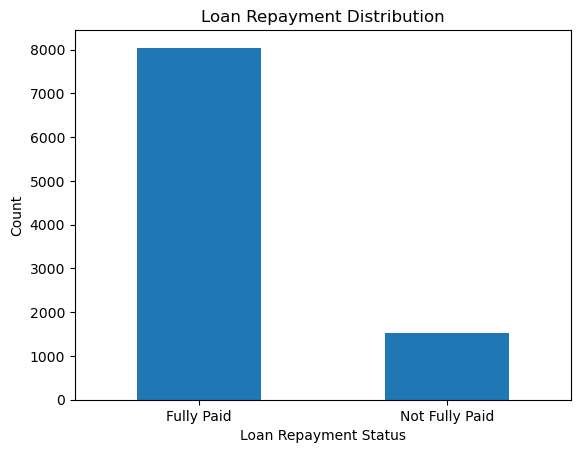

In [45]:
df['not.fully.paid'].value_counts().plot(kind='bar')
plt.xlabel('Loan Repayment Status')
plt.ylabel('Count')
plt.title('Loan Repayment Distribution')
plt.xticks(ticks=[0, 1], labels=['Fully Paid', 'Not Fully Paid'], rotation=0)
plt.show()

**Observation** : Most loans are fully paid, with only a small proportion being not fully paid.

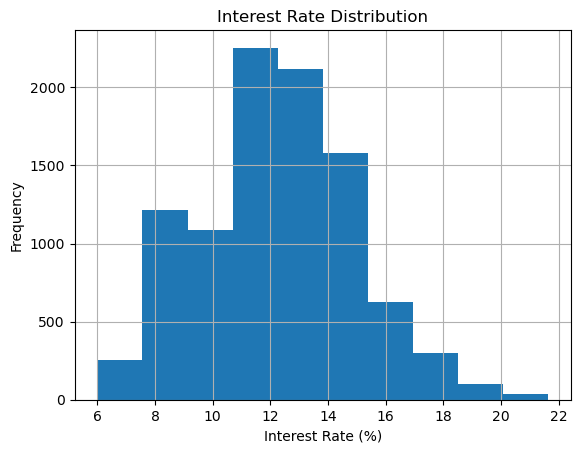

In [47]:
df['int.rate'].hist()
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.title('Interest Rate Distribution')
plt.show()

**Observation** : Most loans have interest rates concentrated between 10% and 14%, with fewer loans at very low or very high interest rates.

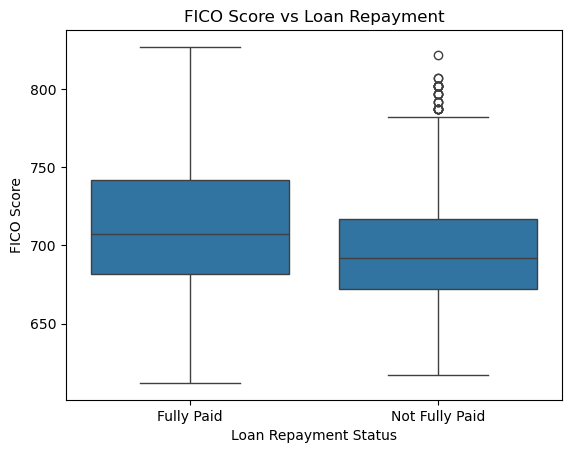

In [49]:
sns.boxplot(x='not.fully.paid', y='fico', data=df)
plt.xlabel('Loan Repayment Status')
plt.ylabel('FICO Score')
plt.title('FICO Score vs Loan Repayment')
plt.xticks(ticks=[0, 1], labels=['Fully Paid', 'Not Fully Paid'], rotation=0)

plt.show()

**Observation** : Borrowers who fully repaid their loans generally have higher FICO scores compared to those who did not fully repay.

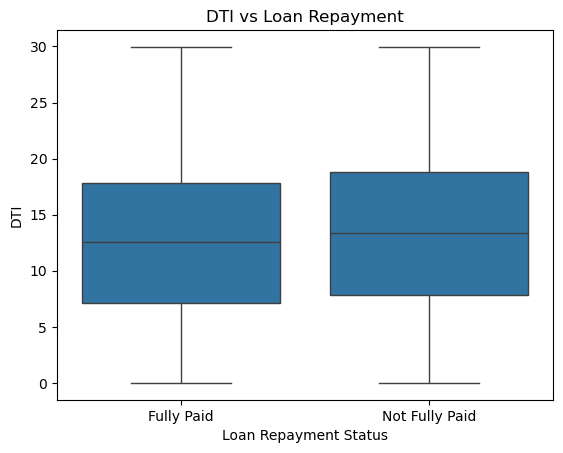

In [51]:
sns.boxplot(x='not.fully.paid', y='dti', data=df)
plt.xlabel('Loan Repayment Status')
plt.ylabel('DTI')
plt.title('DTI vs Loan Repayment')
plt.xticks(ticks=[0, 1], labels=['Fully Paid', 'Not Fully Paid'], rotation=0)

plt.show()

**Observation** : Borrowers who did not fully repay their loans tend to have a slightly higher DTI, indicating greater debt burden compared to fully paid borrowers.

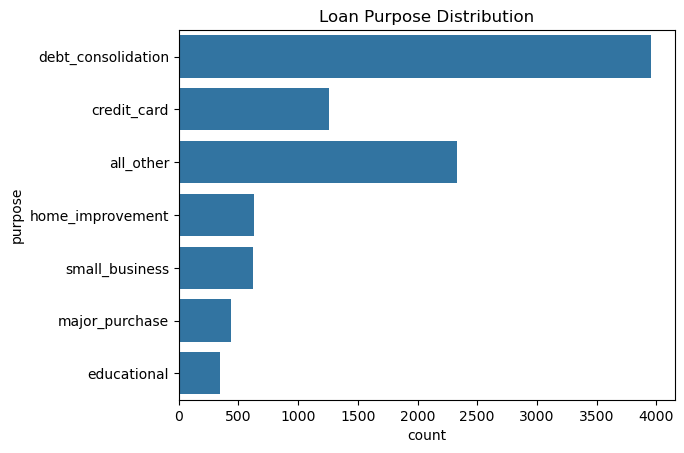

In [53]:
sns.countplot(y='purpose', data=df)
plt.title('Loan Purpose Distribution')
plt.show()

**Observation** : The majority of loans are taken for debt consolidation, followed by all other and credit card purposes, while educational and major purchase loans are the least common.

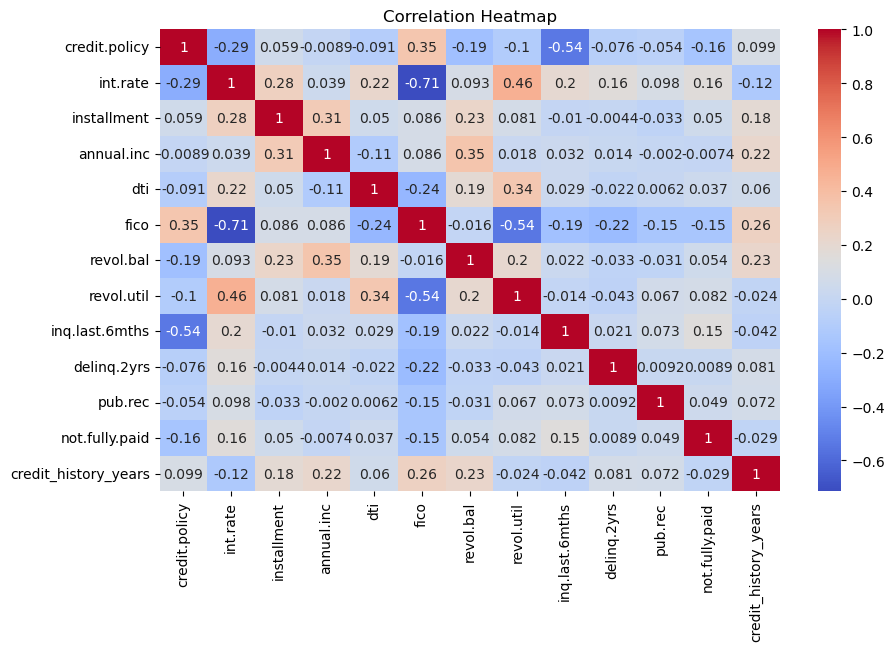

In [55]:
numeric_df = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Step6 : Business Recommendations

1. Focus on approving loans for borrowers with higher FICO scores, as they show a significantly higher probability of full loan repayment.

2. Apply stricter credit policies for borrowers with high debt-to-income (DTI) ratios, as higher DTI is associated with increased default risk.

3. Monitor revolving credit utilization closely and consider setting limits for borrowers with very high `revol.util` values to reduce credit risk.

4. Use past delinquency records and public records (`delinq.2yrs`, `pub.rec`) as key risk indicators during loan approval and pricing decisions.

5. Adjust interest rates based on borrower risk profiles, offering competitive rates to low-risk borrowers and higher rates or stricter terms to high-risk borrowers.

6. Encourage borrowers with short credit histories to opt for smaller loan amounts or shorter tenures to minimize default risk.

7. Implement data-driven loan approval models using historical loan data to improve decision accuracy and reduce financial losses.